<a href="https://colab.research.google.com/github/fazlialtunn/iris-classification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [33]:
data = pd.read_csv("datasets/data_with_nans.csv")

In [34]:
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


# **Removing Null Columns**

In [36]:
data.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [37]:
data.drop(labels=[data.columns[0]], axis=1, inplace=True)

In [38]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [39]:
data.groupby("Species").agg(["min", "max", "std", "mean"])

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [40]:
data.isna().sum()

,0
Id,0
SepalLengthCm,3
SepalWidthCm,1
PetalLengthCm,4
PetalWidthCm,2
Species,0


In [41]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        data.loc[data["Species"] == spec, column] = data.loc[data["Species"] == spec, column].fillna(value=data[data["Species"] == spec][column].mean())

In [42]:
data.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [43]:
data.dropna(axis=0, how="any", inplace=True)

# **Data Visualization**

In [44]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


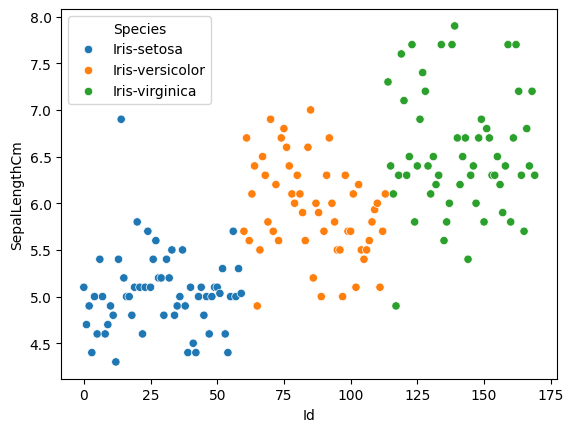

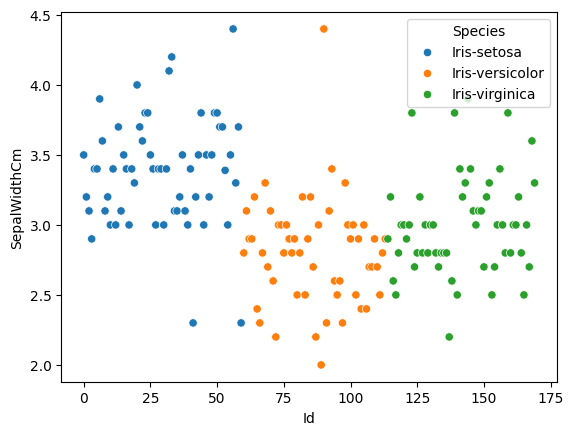

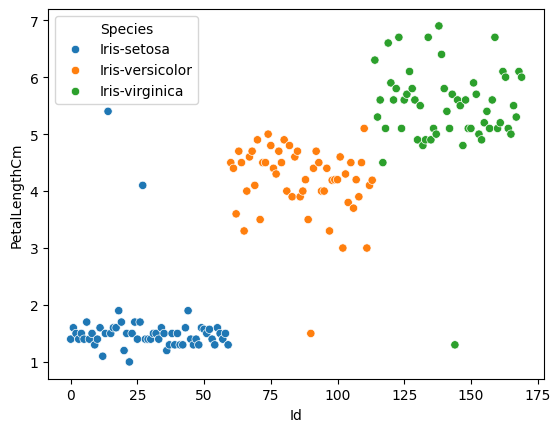

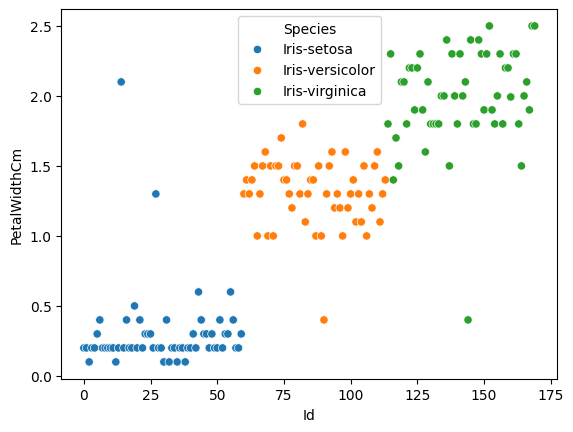

In [45]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data, x="Id", y=column, hue="Species")
    plt.show()

# **Outlier Detection**

## **3 Sigma**

In [46]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"] == spec]
        selected_column = selected_spec[column]

        std = selected_column.std()
        avg = selected_column.mean()

        three_sigma_plus = avg + (3 * std)
        three_sigma_minus =  avg - (3 * std)

        outliers = selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
        data.drop(index=outliers, inplace=True)
        print(column, spec, outliers)

SepalLengthCm Iris-setosa Index([14], dtype='int64')
SepalLengthCm Iris-versicolor Index([], dtype='int64')
SepalLengthCm Iris-virginica Index([], dtype='int64')
SepalWidthCm Iris-setosa Index([], dtype='int64')
SepalWidthCm Iris-versicolor Index([90], dtype='int64')
SepalWidthCm Iris-virginica Index([], dtype='int64')
PetalLengthCm Iris-setosa Index([27], dtype='int64')
PetalLengthCm Iris-versicolor Index([], dtype='int64')
PetalLengthCm Iris-virginica Index([144], dtype='int64')
PetalWidthCm Iris-setosa Index([43, 55], dtype='int64')
PetalWidthCm Iris-versicolor Index([], dtype='int64')
PetalWidthCm Iris-virginica Index([], dtype='int64')


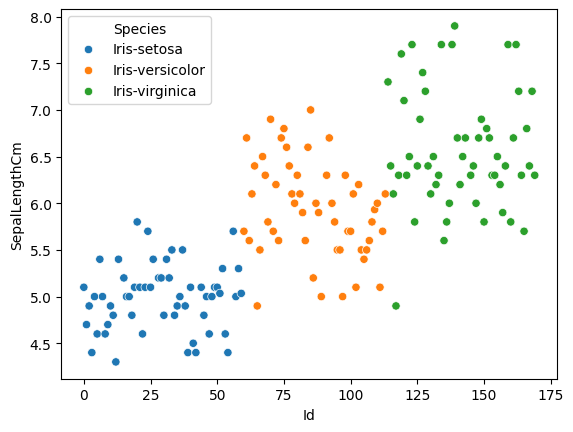

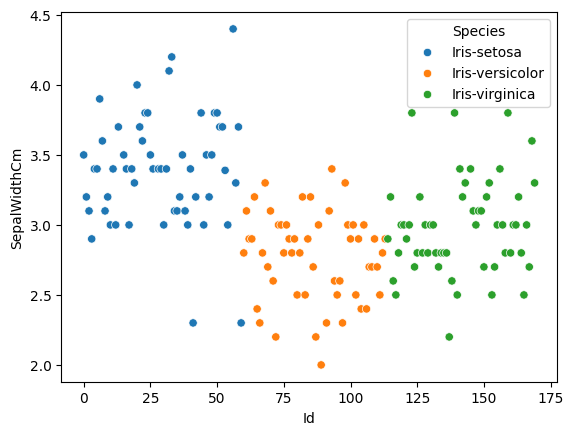

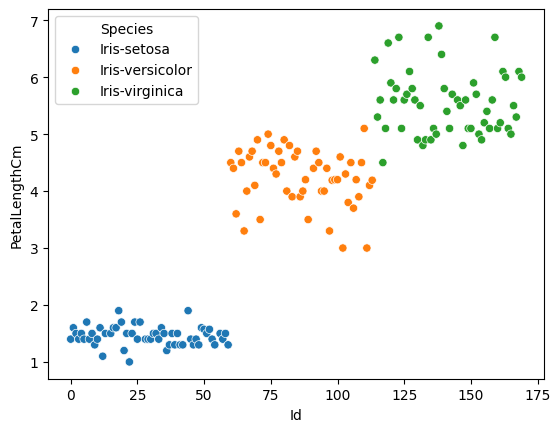

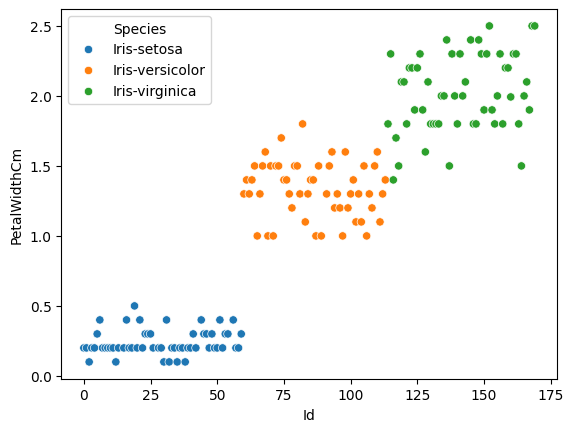

In [47]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data, x="Id", y=column, hue="Species")
    plt.show()

## **IQR - Quantile**

In [48]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"] == spec]
        selected_column = selected_spec[column]

        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)

        iqr = q3 - q1

        minimum = q1 - (1.5 * iqr)
        maximum = q3 + (1.5 * iqr)

        print(column, spec, "| min= ", minimum, "max= ", maximum)

        max_idxs = data[(data["Species"] == spec) & (data[column] > maximum)].index
        print(max_idxs)
        min_idxs = data[(data["Species"] == spec) & (data[column] < minimum)].index
        print(min_idxs)

        data.drop(index=max_idxs, inplace=True)
        data.drop(index=min_idxs, inplace=True)

SepalLengthCm Iris-setosa | min=  4.199999999999999 max=  5.800000000000001
Index([], dtype='int64')
Index([], dtype='int64')
SepalLengthCm Iris-versicolor | min=  4.549999999999999 max=  7.35
Index([], dtype='int64')
Index([], dtype='int64')
SepalLengthCm Iris-virginica | min=  5.15 max=  7.950000000000001
Index([], dtype='int64')
Index([117], dtype='int64')
SepalWidthCm Iris-setosa | min=  2.2 max=  4.6000000000000005
Index([], dtype='int64')
Index([], dtype='int64')
SepalWidthCm Iris-versicolor | min=  1.75 max=  3.75
Index([], dtype='int64')
Index([], dtype='int64')
SepalWidthCm Iris-virginica | min=  2.1999999999999993 max=  3.8000000000000007
Index([], dtype='int64')
Index([], dtype='int64')
PetalLengthCm Iris-setosa | min=  1.2228448275862065 max=  1.6952586206896556
Index([6, 18, 19, 24, 26, 44], dtype='int64')
Index([12, 20, 22, 36], dtype='int64')
PetalLengthCm Iris-versicolor | min=  3.1000000000000005 max=  5.499999999999999
Index([], dtype='int64')
Index([102, 111], dtype=

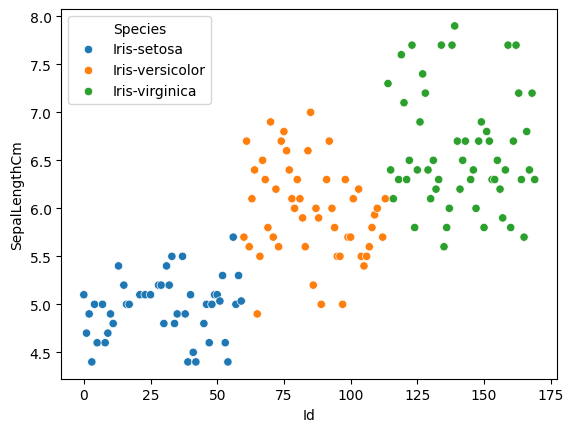

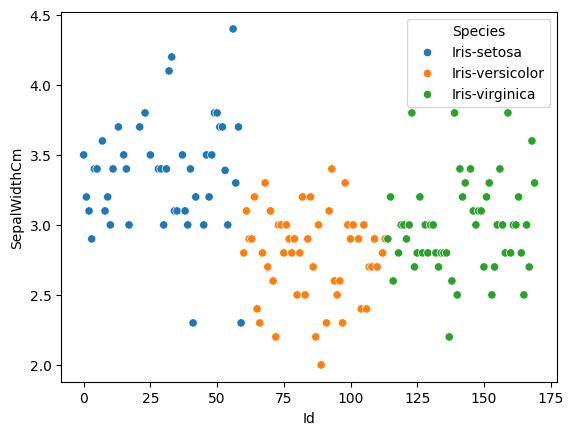

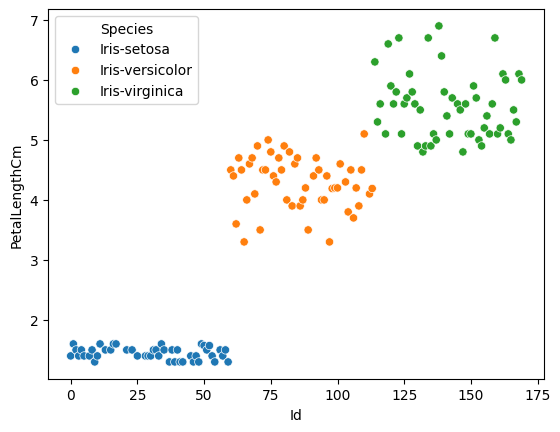

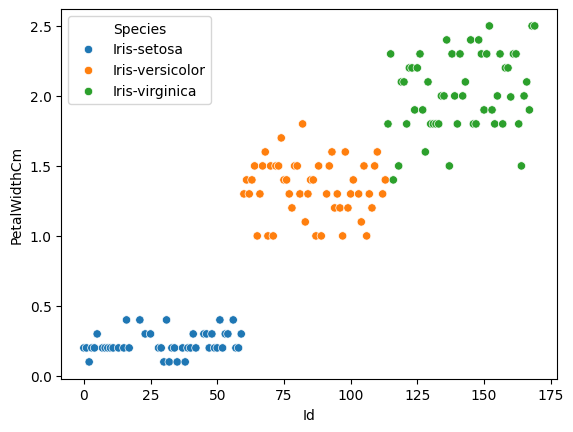

In [49]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data, x="Id", y=column, hue="Species")
    plt.show()

In [50]:
data.to_csv("final_data.csv")

# **Label Encoding**

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
data.drop(["Id"], axis=1, inplace=True)

In [53]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


In [54]:
encoder = LabelEncoder()

In [55]:
data["Species"] = encoder.fit_transform(data["Species"])

In [56]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.7,3.2,1.6,0.2,0
2,4.9,3.1,1.5,0.1,0
3,4.4,2.9,1.4,0.2,0
4,5.0,3.4,1.5,0.2,0


# **Data Check**

In [57]:
data.isna().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [58]:
data.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,int64


In [59]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.7,3.2,1.6,0.2,0
2,4.9,3.1,1.5,0.1,0
3,4.4,2.9,1.4,0.2,0
4,5.0,3.4,1.5,0.2,0


# **Train-Test Split**

In [60]:
from sklearn.model_selection import train_test_split

In [63]:
train_inputs, test_inputs, train_targets, test_targets = train_test_split(data.iloc[:, : -1], data.iloc[:, -1], test_size=0.2, random_state=42)

In [67]:
train_targets

,Species
21,0
143,2
13,0
146,2
65,1
...,...
85,1
124,2
17,0
108,1


# **XGBoost**

In [70]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
xgb_cls = xgb.XGBClassifier(objective="multi:softmax", num_class=3)

In [72]:
xgb_cls.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, ...)

In [73]:
preds = xgb_cls.predict(X_test)

In [74]:
accuracy_score(y_test, preds)

1.0

In [75]:
confusion_matrix(y_test, preds)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])